In [1]:
from loans import Loan
from loans import Applicant
import loans
from search import BST
from search import Node
from loans import Bank
import pandas as pd
import time

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
applicant = Applicant("20-30", ["1", "2", "3"])
applicant

Applicant('20-30', ['Asian', 'Black or African American', 'American Indian or Alaska Native'])

In [4]:
applicant.lower_age()

20

In [5]:
sorted([
    Applicant(">75", ["43", "44"]),
    Applicant("20-30", ["1", "3"]),
    Applicant("35-44", ["22"]),
    Applicant("<25", ["5"]),
])

[Applicant('20-30', ['Black or African American', 'American Indian or Alaska Native']),
 Applicant('<25', ['White']),
 Applicant('35-44', ['Chinese']),
 Applicant('>75', ['Samoan', 'Other Pacific Islander'])]

In [6]:
tree = BST()
tree.add("A", 9)
tree.add("A", 5)
tree.add("B", 22)
tree.add("C", 33)
tree.dump()

A : [9, 5]
B : [22]
C : [33]


In [7]:
t = BST()
t.add("B", 3)
assert len(t.root) == 1
t.add("A", 2)
assert len(t.root) == 2
t.add("C", 1)
assert len(t.root) == 3
t.add("C", 4)
assert len(t.root) == 4
t.root.lookup("A")
t.root.lookup("C")
t.root.lookup("Z")

[]

In [8]:
loan = Loan(loans.values)
loan.applicants

[Applicant('55-64', ['White'])]

In [9]:
loan.interest_rate

3.0

In [10]:
print(loan)


<Loan: 3.0% on $285000.0 with 1 applicant(s)>


In [11]:
loan

<Loan: 3.0% on $285000.0 with 1 applicant(s)>

In [12]:
for amt in loan.yearly_amounts(20000):
    print(amt)

225000.0
211750.0
198102.5
184045.575
169566.94225000002
154653.95051750002
139293.56903302504
123472.3761040158
107176.54738713628
90391.84380875036
73103.59912301287
55296.70709670326
36955.60830960436
18064.27655889249


In [13]:
uwcu = loans.Bank("University of Wisconsin Credit Union")
uwcu.lei

'254900CN1DD55MJDFH69'

In [14]:
uwcu[-1]

<Loan: 2.99% on $185000.0 with 2 applicant(s)>

In [15]:
len(uwcu)

21153

In [16]:
thing = loans.Bank(982173491287)
thing.lei

''

In [17]:
# project: p2
# submitter: debiche
# partner: none
# hours: 7

In [18]:
bank = loans.Bank("First Home Bank")

In [19]:
#q1
sum = 0.0
count = 0.0
for loan in bank.list:
    if(loan.interest_rate != -1):
        sum += loan.interest_rate
        count += 1
average = sum / count
average

2.962962962962963

In [20]:
#q2
sum = 0
count = 0

for loan in bank.list:
    sum += len(loan.applicants)
    count += 1
average = sum / count
average

1.5777777777777777

In [21]:
#q3
dict = {}
for loan in bank.list:
    for applicant in loan.applicants:
        if(str(applicant.age) in dict):
           dict[str(applicant.age)] += 1
        else:
           dict[str(applicant.age)] = 1
dict  

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [22]:
tree = BST()

for loan in bank.list:
    tree.add(loan.interest_rate, loan)


In [23]:
#q4
missing = len(tree.root.lookup(-1))
missing

18

In [24]:
#q5
def height(node):
    if node is None:
        return 0
    else:
        lDepth = height(node.left)
        rDepth = height(node.right)
        
        if(lDepth > rDepth):
            return lDepth + 1
        else:
            return rDepth + 1
        
height(tree.root)

9

In [25]:
IndividualBank = loans.Bank("University of Wisconsin Credit Union")

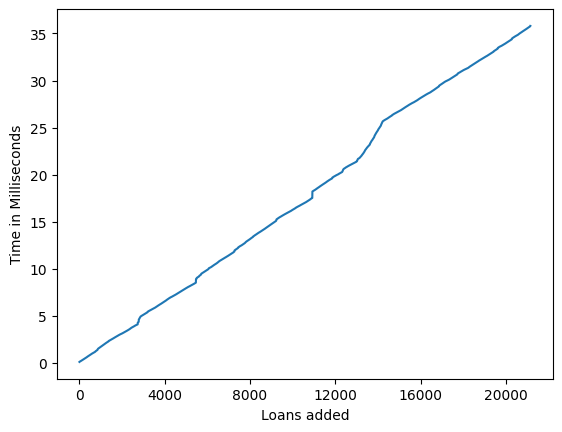

In [26]:
#q6
dict = {}
loancount = 0
t1 = time.time()
t = BST()
for loan in IndividualBank.list:
    
    t.add(loan.interest_rate, loan)
    loancount += 1
    t2 = time.time()
    dict[loancount] = (t2-t1) * 1000
    
datapd = pd.Series(dict)
datax = datapd.plot(xlabel = "Loans added", ylabel = "Time in Milliseconds", xticks = range(0, 24000, 4000))

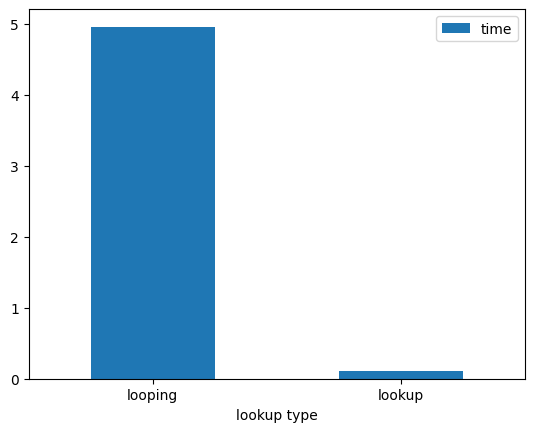

In [27]:
#q7
dict = {"lookup type" : ["looping", "lookup"], "time" : []}

t1 = time.time()
count = 0
for loan in IndividualBank.list:
    if(loan.interest_rate == -1):
        count += 1
t2 = time.time()
dict["time"].append((t2-t1)*1000)

t1 = time.time()
x = len(t.root.lookup(-1))
t2 = time.time()
dict["time"].append((t2-t1)*1000)

df = pd.DataFrame(dict)
ax = df.plot.bar(x='lookup type', y='time', rot=0)

{'race selection': [1, 2, 0, 3, 4, 5],
 'applicants': [29646, 1134, 3409, 105, 3, 2]}

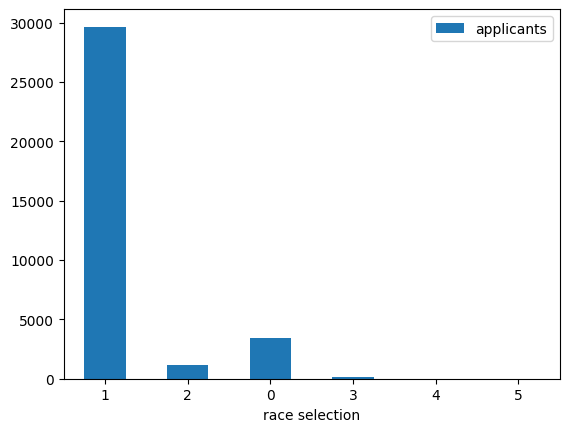

In [28]:
#q8
dict = {"race selection" : [],"applicants": []}
for loan in IndividualBank.list:
    for applicant in loan.applicants:
        if (len(applicant.race)) in dict["race selection"]:
            index = dict["race selection"].index(len(applicant.race))
            dict["applicants"][index] += 1
            
        else:
            dict["race selection"].append(len(applicant.race))
            dict["applicants"].append(1)
df = pd.DataFrame(dict)
ax = df.plot.bar(x = 'race selection', y = 'applicants', rot = 0)
dict

In [29]:
#q9
def leafCount(node):
    if node is None:
        return 0
    if(node.left is None and node.right is None):
        return 1
    else:
        return leafCount(node.left) + leafCount(node.right)
leafCount(t.root)

9

In [30]:
#q10
def find_largest(node):
    
    current = node
    
    while current:
        if not current.right:
            return current.key
        current = current.right

def find_second_largest(node):
    if(node is None or (node.left is None and node.right is None)):
        return 0
    current = node
    
    while current:
        
        if current.left and not current.right:
            return find_largest(current.left)
        
        if (current.right and not current.right.left and not current.right.right):
            return current.key
        
        current = current.right
        
find_second_largest(t.root)

6.99